In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_rows = 15
# устанавливает максимальное количество отображаемых строк(rows) и столбцов(columns). Усеченные линии заменяются многоточием.

In [3]:
plt.style.use("ggplot")
# plt.style.available
# Matplotlib Style Gallery

In [4]:
plt.rcParams["figure.figsize"] = (15, 5)
# Это делает ширину фигуры 15 дюймов и ее высоту 5 дюймов.

In [5]:
plt.rcParams["font.family"] = "sans-serif"
# Настройка семейства шрифтов

In [6]:
weather_all = pd.read_csv("../resources/weather_2012_all.csv",
                          index_col="Date/Time",
                          parse_dates=True)
weather_all.dtypes

ï»¿"Longitude (x)"     float64
Day                      int64
Time                    object
Temp (ÂC)              float64
Dew Point Temp (ÂC)    float64
Rel Hum (%)              int64
Wind Spd (km/h)          int64
Visibility (km)        float64
Stn Press (kPa)        float64
Weather                 object
dtype: object

In [7]:
weather_all

,"ï»¿""Longitude (x)""",Day,Time,Temp (ÂC),Dew Point Temp (ÂC),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,,,,
2012-01-01 00:00:00,-73.75,1,00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-73.75,1,01:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-73.75,1,02:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-73.75,1,03:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-73.75,1,04:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,-73.75,31,19:00,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,-73.75,31,20:00,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-73.75,31,21:00,-0.5,-1.5,93,28,4.8,99.95,Snow


In [8]:
weather_discription = weather_all["Weather"]

In [9]:
is_snowing = weather_discription.str.contains("Snow").astype(int)
# создание df по одному признаку и преобразование векторных величин ( False/True) в 0/1

In [10]:
is_snowing

Date/Time
2012-01-01 00:00:00    0
2012-01-01 01:00:00    0
2012-01-01 02:00:00    0
2012-01-01 03:00:00    0
2012-01-01 04:00:00    0
                      ..
2012-12-31 19:00:00    1
2012-12-31 20:00:00    1
2012-12-31 21:00:00    1
2012-12-31 22:00:00    1
2012-12-31 23:00:00    1
Name: Weather, Length: 8784, dtype: int64

<AxesSubplot:xlabel='Date/Time'>

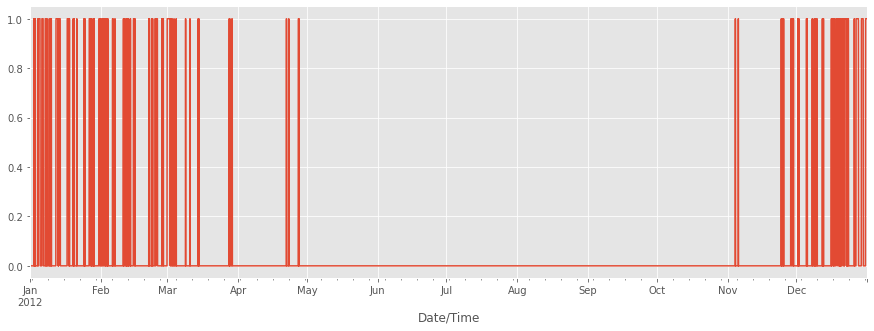

In [11]:
is_snowing.plot()

In [12]:
weather_all.columns = ("dell", "day", "time", "temp", "dew_temp", "rel",
                       "wind", "visibility", "press", "weather")

<AxesSubplot:xlabel='Date/Time'>

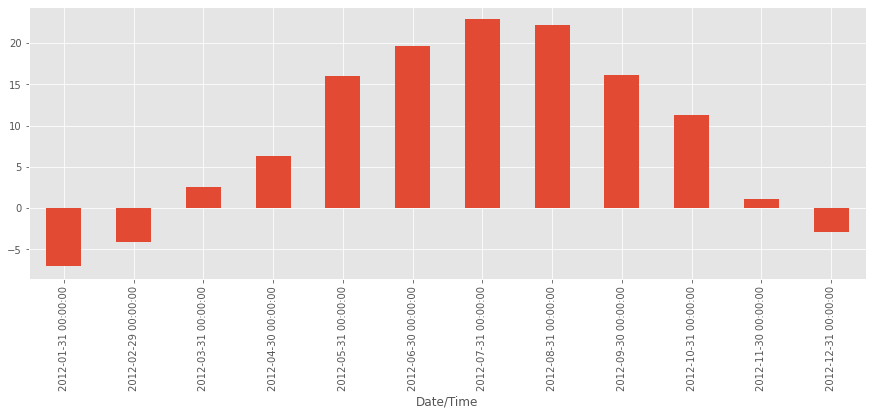

In [13]:
weather_all["temp"].resample("M").median().plot(kind="bar")

In [14]:
is_snowing.resample("M").mean()
# процент времени, когда шёл снег.

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

<AxesSubplot:xlabel='Date/Time'>

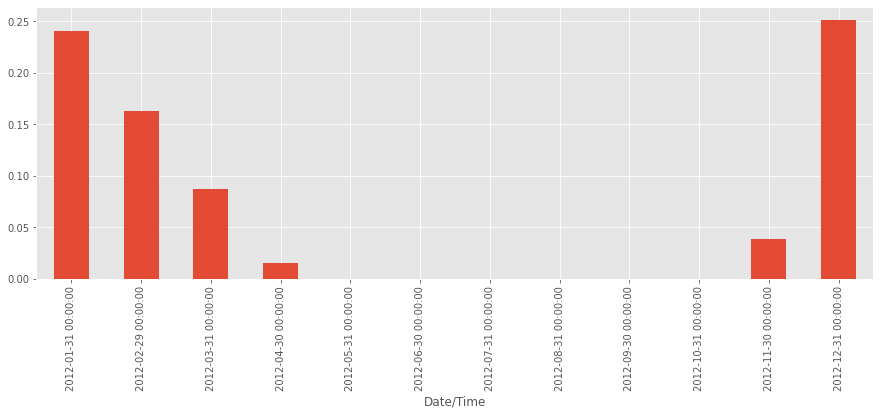

In [15]:
is_snowing.resample("M").mean().plot(kind="bar")

In [18]:
temperature=weather_all["temp"].resample("M").median()
is_snowing=weather_all["weather"].str.contains("Snow")
snowiness=is_snowing.astype(int).resample("M").mean()

In [20]:
# name the columns
temperature.name="Temperature"
snowiness.name="Snowiness"

In [22]:
df_snow=pd.concat([temperature,snowiness],axis=1)

In [23]:
df_snow

,Temperature,weather
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


<AxesSubplot:xlabel='Date/Time'>

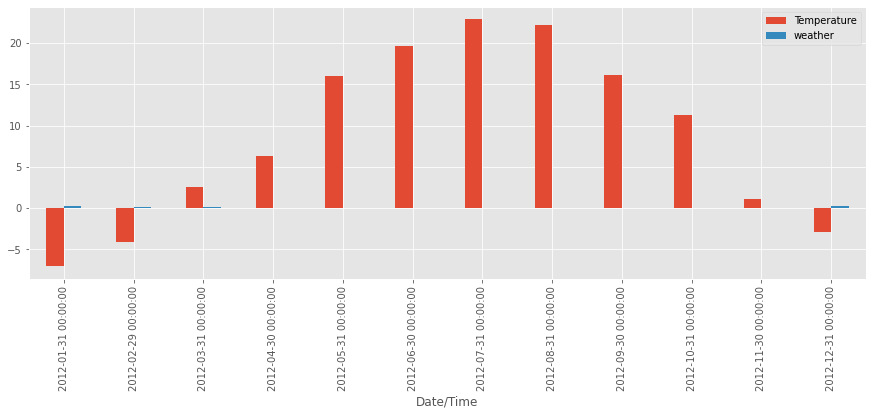

In [26]:
df_snow.plot(kind="bar")

array([<AxesSubplot:title={'center':'Temperature'}, xlabel='Date/Time'>,
       <AxesSubplot:title={'center':'weather'}, xlabel='Date/Time'>],
      dtype=object)

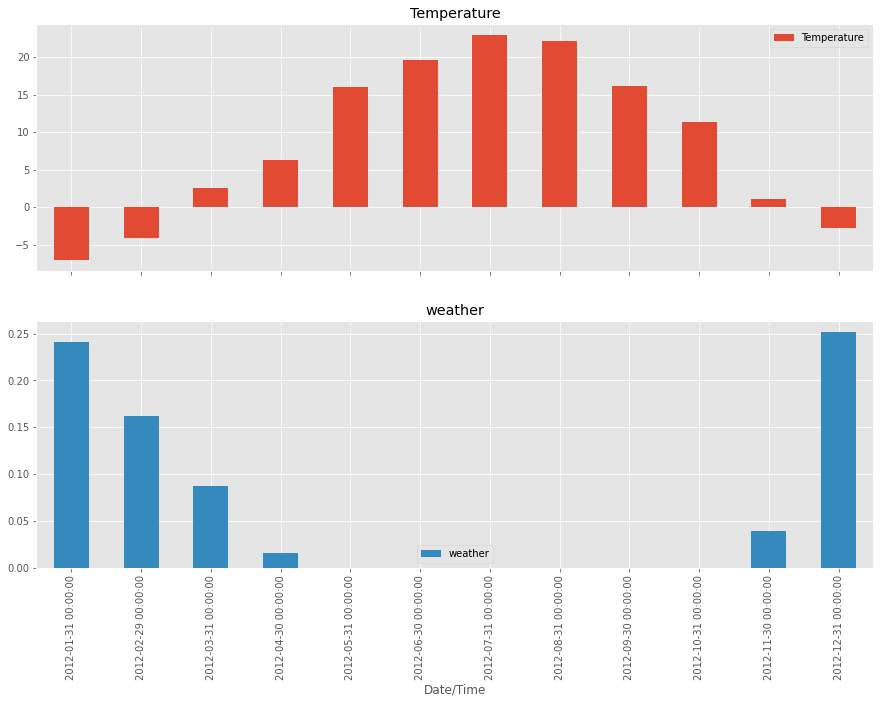

In [27]:
df_snow.plot(kind="bar",subplots=True,figsize=(15,10))